# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

In [15]:
print("hello")

hello


`imports`, you've seen this before!

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import fiona
import os
from datetime import datetime

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [6]:
fuel_depots = pd.read_csv("LiquidFuelDepots_v1.csv")
print("done")

done


In [7]:
fuel_depots.head()

OBJECTID FEATURETYPE                                        DESCRIPTION  \
0         1  Fuel Depot  A facility used for the bulk storage of petrol...   
1         2  Fuel Depot  A facility used for the bulk storage of petrol...   
2         3  Fuel Depot  A facility used for the bulk storage of petrol...   
3         4  Fuel Depot  A facility used for the bulk storage of petrol...   
4         5  Fuel Depot  A facility used for the bulk storage of petrol...   

        CLASS  FID                      NAME OPERATIONALSTATUS  \
0  Fuel Depot   52                      Eden       Operational   
1  Fuel Depot   53  Temora Fuel Distributors       Operational   
2  Fuel Depot   54                     Dubbo       Operational   
3  Fuel Depot   55                     Dubbo       Operational   
4  Fuel Depot   56                     Dubbo       Operational   

                   OPERATOR   OWNER                 ADDRESS  SUBURB  \
0                    Caltex  Caltex   Lot 23 Ben Boyd Drive    Eden   
1  Temora Fuel Distributors      BP       9 Ironbark Street  Temora   
2          Inland Petroleum      BP      105 Erskine Street   Dubbo   
3   Lowes Petroleum Service   Mobil      107 Erskine Street   Dubbo   
4                     Shell   Shell  109-113 Erskine Street   Dubbo   

             STATE  SPATIALCONFIDENCE   REVISED  \
0  New South Wales                  4  20121004   
1  New South Wales                  5  20121004   
2  New South Wales                  5  20121004   
3  New South Wales                  5  20121004   
4  New South Wales                  5  20121004   

                                             COMMENT   LATITUDE   LONGITUDE  
0  8 lay Down tanks + 1 lay down tank possibly fo... -37.038479  149.891540  
1  3 med + 1 med + 1 separate lay down tank, 2 me... -34.447685  147.552978  
2  Station as well, 1 Terminal sized upright + 10... -32.244324  148.610268  
3  Station as well, 5 large + 2 small upright tan... -32.244473  148.611153  
4  Station as well, 1 terminal sized + 1 small up... -32.244732  148.612396

`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [8]:
fuel_depots.columns

Index(['OBJECTID', 'FEATURETYPE', 'DESCRIPTION', 'CLASS', 'FID', 'NAME',
       'OPERATIONALSTATUS', 'OPERATOR', 'OWNER', 'ADDRESS', 'SUBURB', 'STATE',
       'SPATIALCONFIDENCE', 'REVISED', 'COMMENT', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [9]:
fuel_depots["OWNER"]

0     Caltex
1         BP
2         BP
3      Mobil
4      Shell
       ...  
61    Caltex
62    Caltex
63        BP
64    Caltex
65    Caltex
Name: OWNER, Length: 66, dtype: object

In [10]:
fuel_depot_data = fuel_depots["OWNER"].value_counts()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

Text(0, 0.5, 'Company Name')

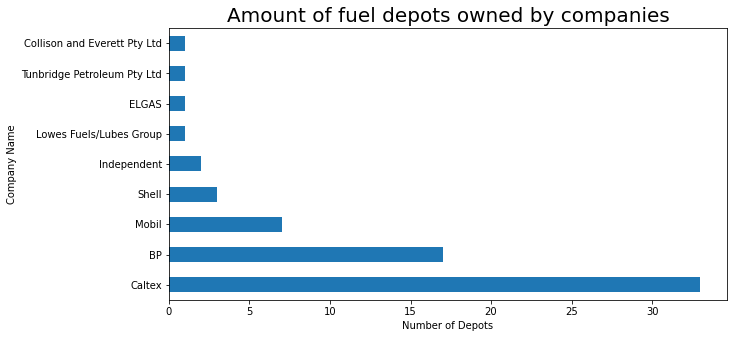

In [11]:
fuel_depot_data = fuel_depots["OWNER"].value_counts()
fuel_depot_data.plot.barh()
plt.title("Amount of fuel depots owned by companies", fontsize = 20)
plt.xlabel("Number of Depots", fontsize = 10)
plt.ylabel("Company Name", fontsize = 10)

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, boolean indexing:

In [12]:
fuel_depots["LATITUDE"]

0    -37.038479
1    -34.447685
2    -32.244324
3    -32.244473
4    -32.244732
        ...    
61   -35.788231
62   -35.655590
63   -30.224019
64   -33.846180
65   -32.265606
Name: LATITUDE, Length: 66, dtype: float64

In [22]:
fuel_depots["geometry"] = fuel_depots.apply(lambda row: f"{row.LONGITUDE} {row.LATITUDE}", axis =1)



In [23]:
fuel_depots["geometry"]

0     149.8915405 -37.03847885
1     147.5529785 -34.44768524
2     148.6102676 -32.24432373
3      148.6111526 -32.2444725
4      148.6123962 -32.2447319
                ...           
61     144.5985336 -35.7882309
62    145.8013153 -35.65559006
63    149.4325104 -30.22401905
64    150.9434586 -33.84617996
65    150.8867264 -32.26560593
Name: geometry, Length: 66, dtype: object

In [33]:
type(fuel_depots.geometry)

pandas.core.series.Series

AttributeError: 'Series' object has no attribute 'crs'

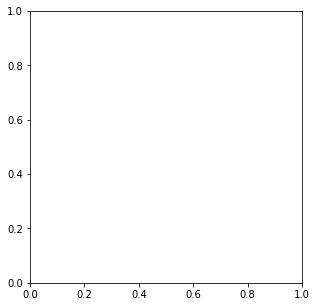

In [34]:
fuel_depots_map = gp.GeoDataFrame(fuel_depots)
fuel_depots_map.sample(2)
fuel_depots_map.plot()
for idx, row in fuel_depots_map.iterrows():
    plt.annotate(s=row['OWNER'], xy=row['geometry'[0]],
                 horizontalalignment='center')


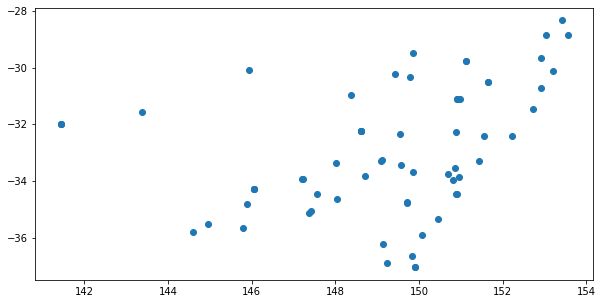

In [23]:
plt.scatter(fuel_depots.LONGITUDE, fuel_depots.LATITUDE)



<AxesSubplot:>

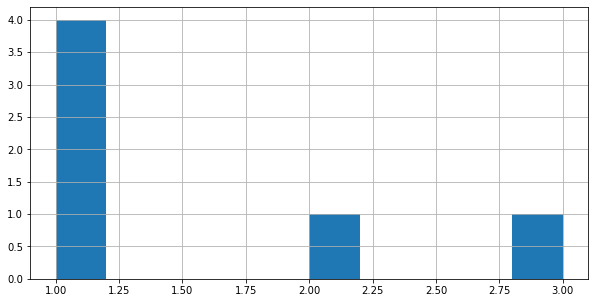

In [ ]:
fuel_depot_data[fuel_depot_data < 5].hist()

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [ ]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [ ]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [ ]:
some_numbers[(some_numbers < 4) | (some_numbers > 97)] #this needs the round brackets,
                                                       # not really sure why.

0      0
1      1
2      2
3      3
98    98
99    99
dtype: int64

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [ ]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools) # , list(zip(pattern_of_bools, pets))

pets_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [ ]:
pets_we_care_about = []
for p in pets:
    if len(p)==4:
        pets_we_care_about.append(p)
pets_we_care_about

['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [ ]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat\xa0and\xa0Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [ ]:
[p.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT\xa0AND\xa0LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [ ]:
[p for p in pets if len(p)==4]

['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [ ]:
[p.upper() for p in pets if len(p)==5]

['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

<AxesSubplot:>

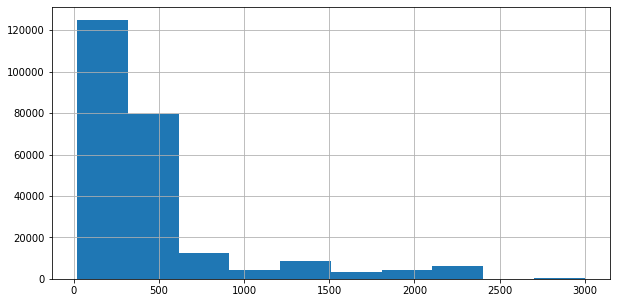

In [ ]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 3000].hist()

Let's see what's under $1000

<AxesSubplot:>

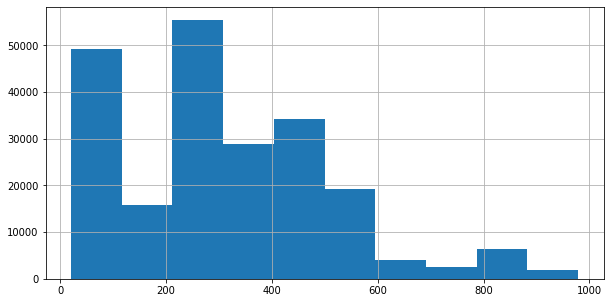

In [ ]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [ ]:
penalty_data.head(2)

OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    01/07/2011         74731   
1       2011-2012    01/07/2011          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... RED_LIGHT_CAMERA_IND SPEED_CAMERA_IND SEATBELT_IND  \
0         7163.0  ...                    Y              NaN          NaN   
1            NaN  ...                  NaN              NaN          NaN   

  MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0              NaN         NaN      NaN      NaN                 NaN   
1              NaN           Y      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE  
0           46       16238  
1           78       20670  

[2 rows x 25 columns]

We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
penalty_data["LEGISLATION"].value_counts()

ROAD RULES 2008                                              103558
ROAD RULES 2014                                               88546
PASSENGER TRANSPORT REGULATION 2007                            4446
ROAD TRANSPORT (VEHICLE REGISTRATION) REGULATION 2007          4185
PROTECTION OF THE ENVIRONMENT OPERATIONS ACT 1997              3070
                                                              ...  
HEMP INDUSTRY ACT 2008                                            1
NON-INDIGENOUS ANIMALS ACT 1987                                   1
FOOD REGULATION 2015                                              1
CHILDREN AND YOUNG PERSONS (CARE AND PROTECTION) ACT 1998         1
SPORTING VENUES AUTHORITIES REGULATION 2014                       1
Name: LEGISLATION, Length: 211, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<AxesSubplot:>

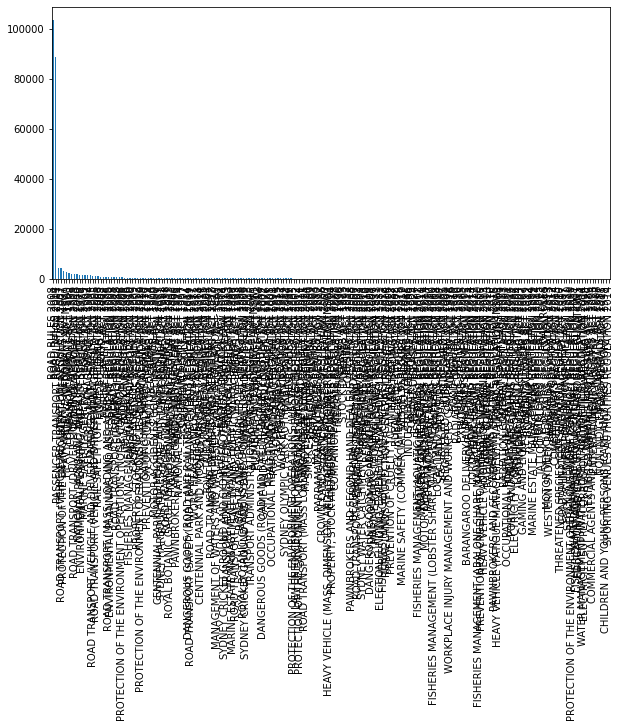

In [ ]:
penalty_data["LEGISLATION"].value_counts().plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

<AxesSubplot:>

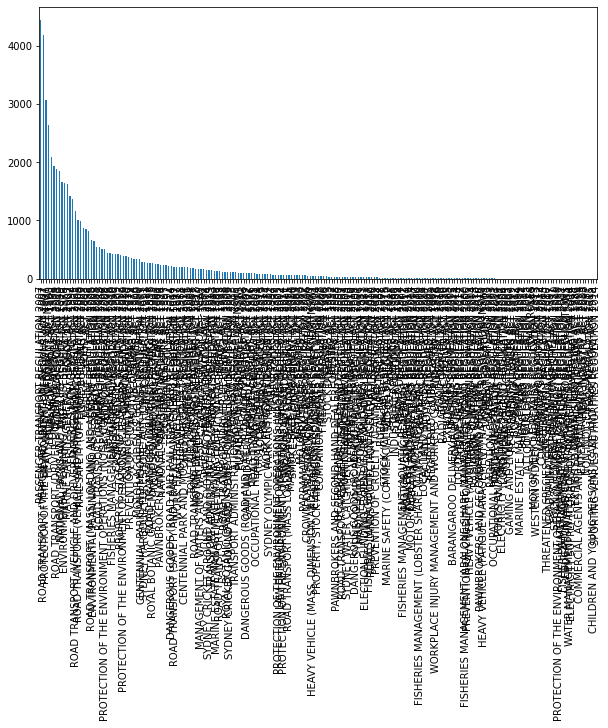

In [ ]:
pdvc = penalty_data["LEGISLATION"].value_counts()
pdvc[pdvc < 5000].plot(kind="bar")

This pattern keeps repeating itself:

<AxesSubplot:>

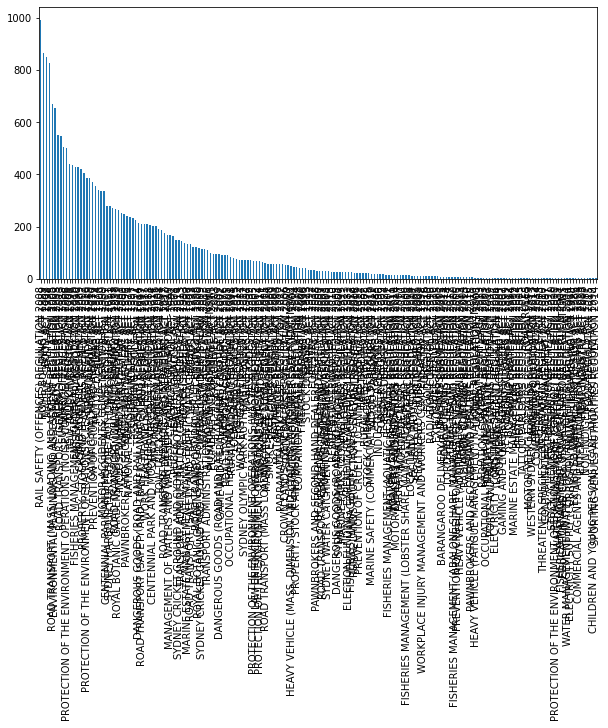

In [ ]:
pdvc[pdvc < 1000].plot(kind="bar")

<AxesSubplot:>

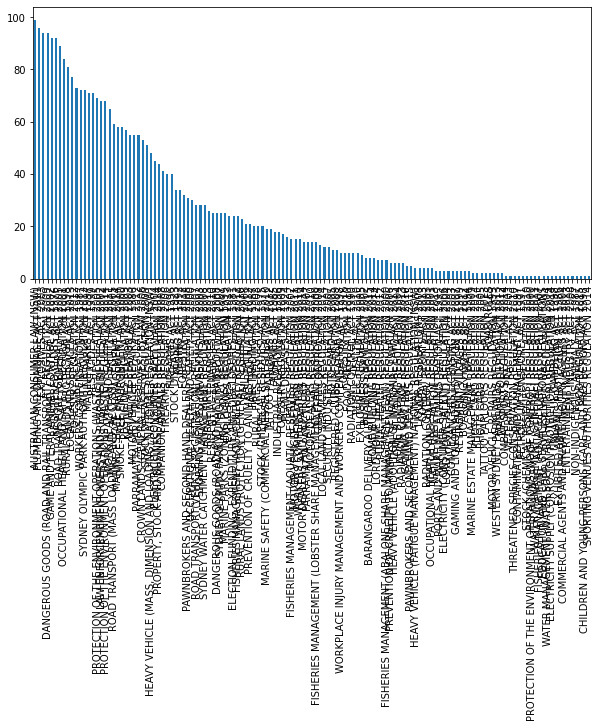

In [ ]:
pdvc[pdvc < 100].plot(kind="bar")

<AxesSubplot:>

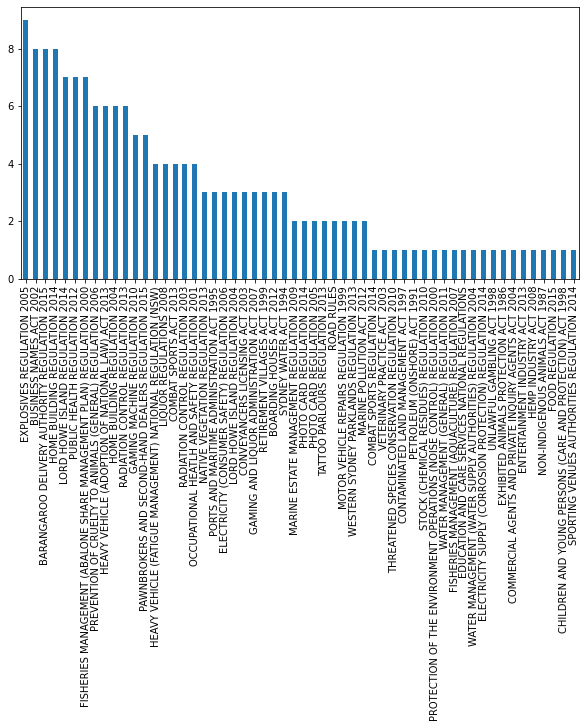

In [ ]:
pdvc[pdvc < 10].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it
mu = 100
sigma = 15
x = mu + sigma*np.random.randn(10000)

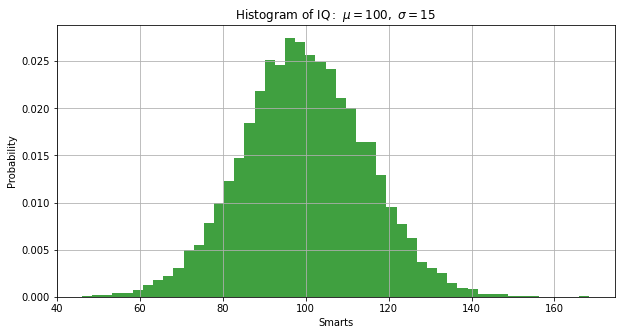

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
plt.grid(True)
# plt.show()

Here's how we made our histogram before:

<AxesSubplot:>

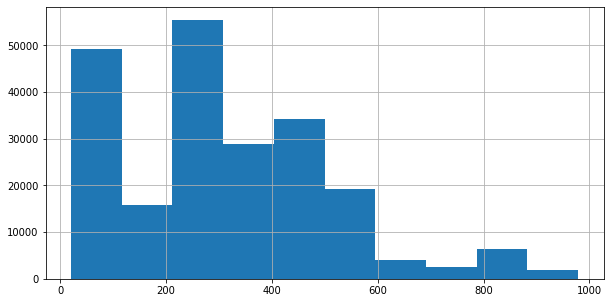

In [ ]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using matpolotlib directly:

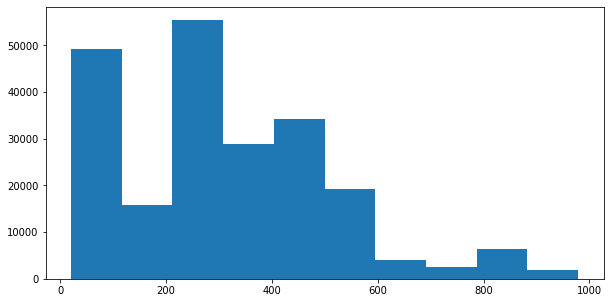

In [ ]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

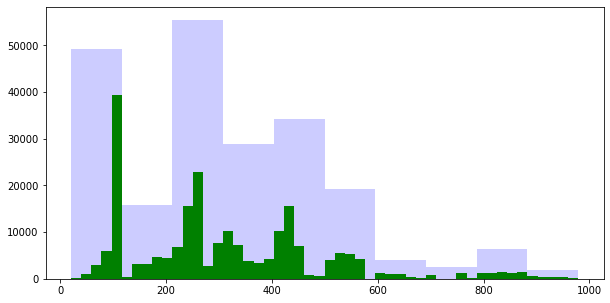

In [ ]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

We can go back to our initial, unfiltered, data:

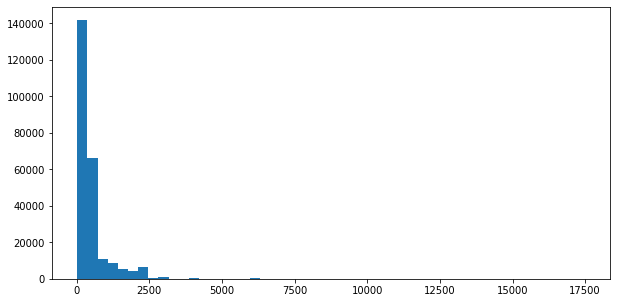

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

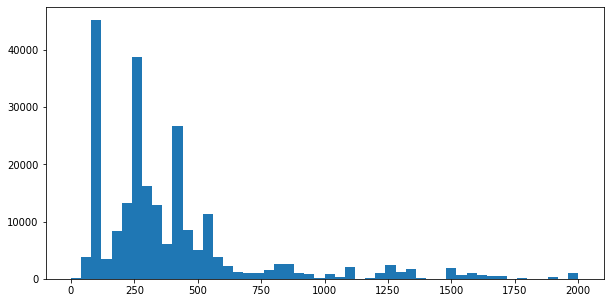

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

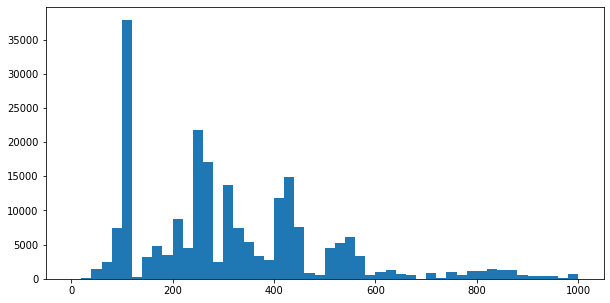

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

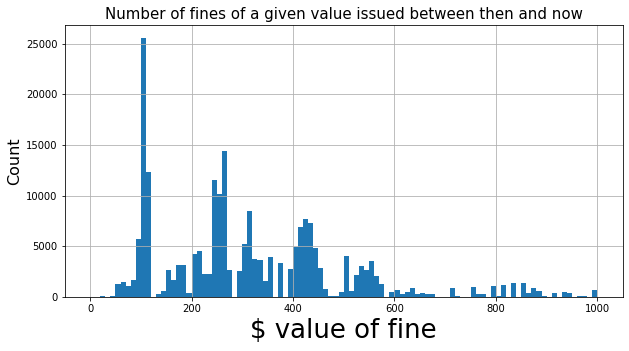

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=16)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
penalty_data.head(2)

OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... RED_LIGHT_CAMERA_IND SPEED_CAMERA_IND SEATBELT_IND  \
0         7163.0  ...                    Y              NaN          NaN   
1            NaN  ...                  NaN              NaN          NaN   

  MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0              NaN         NaN      NaN      NaN                 NaN   
1              NaN           Y      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE  
0           46       16238  
1           78       20670  

[2 rows x 25 columns]

This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
f"range is: {penalty_data.OFFENCE_MONTH.min()} to {penalty_data.OFFENCE_MONTH.max()}"

'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date   = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

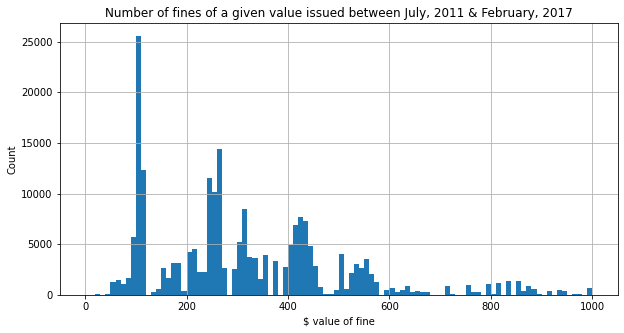

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title(f"Number of fines of a given value issued between {earliest_date} & {latest_date}", fontsize=12)
plt.xlabel('$ value of fine', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True)
plt.show()

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

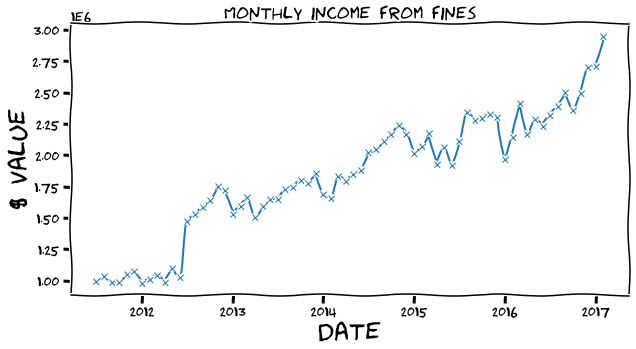

In [ ]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

In [ ]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)

<ipython-input-191-beb3bd65b756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... SEATBELT_IND MOBILE_PHONE_IND PARKING_IND CINS_IND  \
0         7163.0  ...          NaN              NaN         NaN      NaN   
1            NaN  ...          NaN              NaN           Y      NaN   

  FOOD_IND BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day day_from_lambda  
0      NaN                 NaN           46       16238   1               1  
1      NaN                 NaN           78       20670   1               1  

[2 rows x 27 columns]

Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day

ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)

<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND  \
0         7163.0  ...              NaN         NaN      NaN      NaN   

  BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day day_from_lambda  \
0                 NaN           46       16238   1               1   

  day_from_function  
0                 1  

[1 rows x 28 columns]

Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A") 

ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)

<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0         7163.0  ...         NaN      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE day day_from_lambda day_from_function nice_day  
0           46       16238   1               1                 1   Friday  

[1 rows x 29 columns]

Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

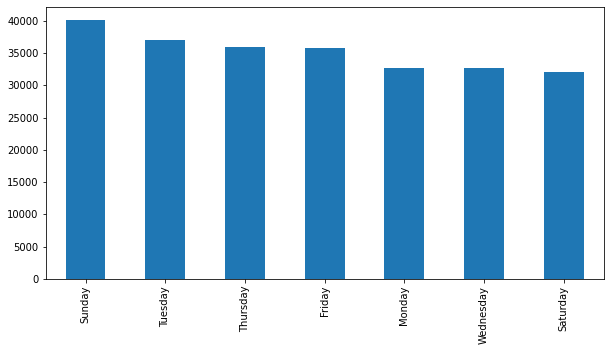

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A") 

penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")

And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_